In [6]:
#importing necessary libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [7]:
df=pd.read_csv('skindataall.csv')

In [8]:
df.head()

,Unnamed: 0,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [9]:
df.tail()

,Unnamed: 0,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
8644,8698,Tinkfairy,Fair,Combination,Hazel,Brunette,5,I was looking for a overnight serum with retin...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,3127,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['wa', 'looking', 'overnight', 'serum', 'retin...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8645,8699,baeyonce,Light,Combination,Blue,Blonde,5,I have never experienced such fast results in ...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,3616,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['never', 'experienced', 'fast', 'result', 'li...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8646,8700,JustJC,Dark,Combination,Brown,Black,5,Holy grail product for me! Everyone can tell w...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,1464,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['holy', 'grail', 'everyone', 'tell', 'using']",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8647,8701,Latchmi,No data,No data,No data,No data,5,I love this product very much. Very much ! Exp...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,1733,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['love', 'much', 'much', 'expensive', 'amazing...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."
8648,8702,xc1148,No data,No data,No data,No data,5,I have tried a million creams and treatments f...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,...,1,1,Moisturizer,https://www.sephora.com/product/ferulic-retino...,6824,124,"['dicaprylyl', 'carbonate', 'niacinamide', 'ce...","['tried', 'million', 'cream', 'treatment', 'fa...",1,"dicaprylyl, carbonate, niacinamide, cetyl, alc..."


In [10]:
df.shape

(8649, 26)

In [11]:
df.columns

Index(['Unnamed: 0', 'Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color',
       'Hair_Color', 'Rating_Stars', 'Review', 'Product', 'Brand', 'Price',
       'Rating', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily',
       'Sensitive', 'Category', 'Product_Url', 'User_id', 'Product_id',
       'Ingredients_Cleaned', 'Review_Cleaned', 'Good_Stuff', 'Ing_Tfidf'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8649 non-null   int64  
 1   Username             8649 non-null   object 
 2   Skin_Tone            8649 non-null   object 
 3   Skin_Type            8649 non-null   object 
 4   Eye_Color            8649 non-null   object 
 5   Hair_Color           8649 non-null   object 
 6   Rating_Stars         8649 non-null   int64  
 7   Review               8649 non-null   object 
 8   Product              8649 non-null   object 
 9   Brand                8649 non-null   object 
 10  Price                8649 non-null   int64  
 11  Rating               8649 non-null   float64
 12  Ingredients          8649 non-null   object 
 13  Combination          8649 non-null   int64  
 14  Dry                  8649 non-null   int64  
 15  Normal               8649 non-null   i

EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Skin_Tone'>

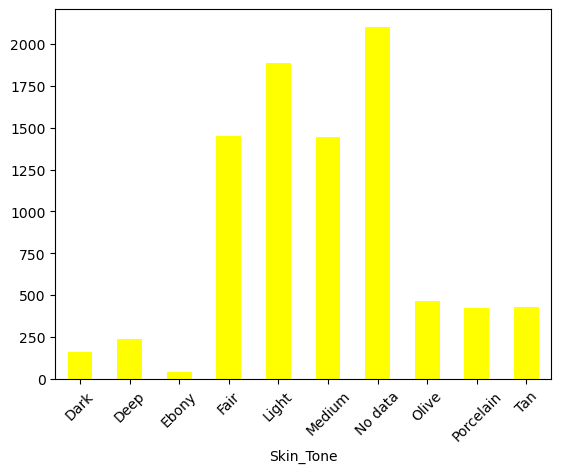

In [13]:
a=df.groupby('Skin_Tone')['Username'].count()
a.plot.bar(color='yellow',rot=45)

<AxesSubplot:xlabel='Skin_Type'>

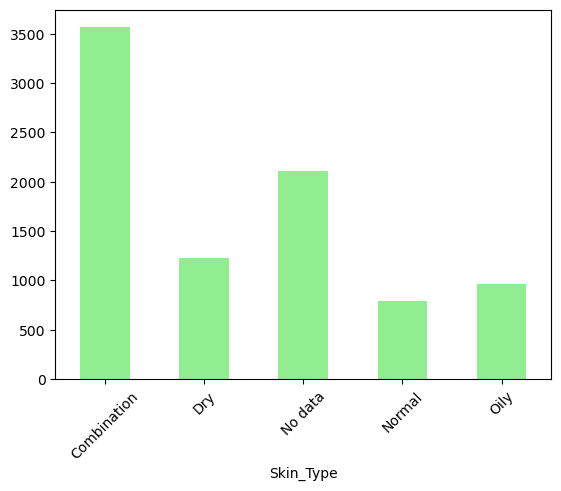

In [14]:
b=df.groupby('Skin_Type')['Username'].count()
b.plot.bar(color='lightgreen',rot=45)

<AxesSubplot:xlabel='Eye_Color'>

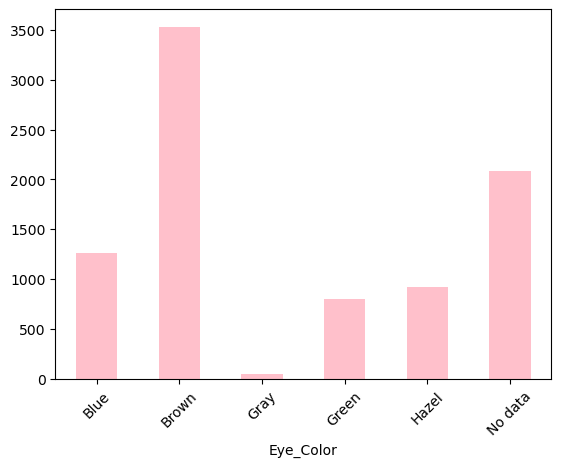

In [15]:
c=df.groupby('Eye_Color')['Username'].count()
c.plot.bar(color='pink',rot=45)

<AxesSubplot:xlabel='Hair_Color'>

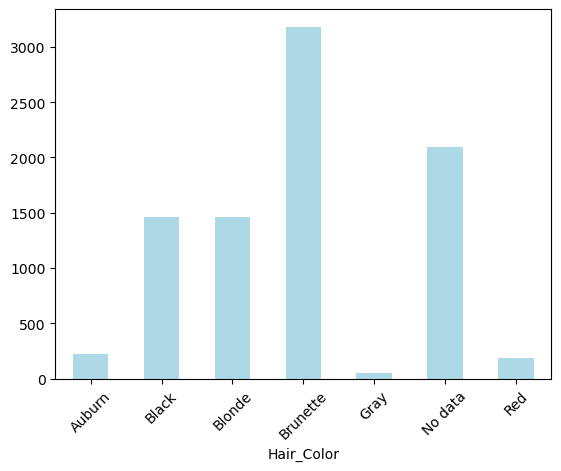

In [16]:
d=df.groupby('Hair_Color')['Username'].count()
d.plot.bar(color='lightblue',rot=45)

<AxesSubplot:xlabel='Rating_Stars'>

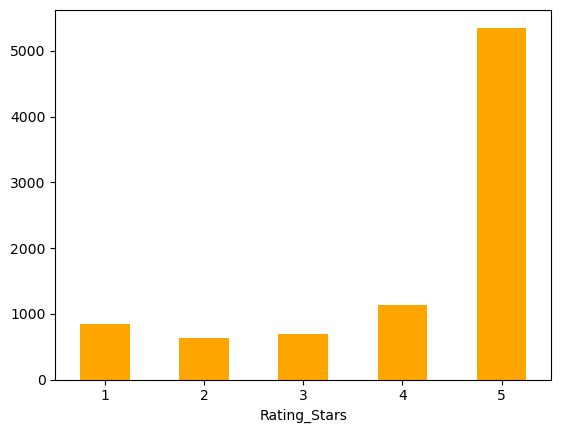

In [17]:
e=df.groupby('Rating_Stars')['Username'].count()
e.plot.bar(color='orange',rot=0)

Markov chain Neural Net for Language Generator

In [19]:
import markovify
import string
import re

#r'': The r before the quotes makes the string a raw string literal, which tells Python not to interpret backslashes as escape characters.
#^: Inside a character class, the caret ^ negates the class, meaning it will match any character not in the following list.
#\w: This matches any "word" character (alphanumeric characters plus underscore).
#\s: This matches any whitespace character (spaces, tabs, newlines).

In [21]:
#function for no punctuation
def no_punc(string):
    s=re.sub(r'[^\w\s]','',string)
    return s

In [22]:
df['Review']=df.apply(lambda row:no_punc(row['Review']),axis=1)
text=markovify.NewlineText(df.Review,state_size=2)

In [23]:
for i in range(3):
      print(text.make_sentence())

This product seems to work with me with my last moisturizer was recommended as most advertising says
this is my second time purchase and was almost half the price Refreshing light and washes off very quickly and doesnt feel dry if you have sensitive skin and even worse and caused me an error I dont love the results I have acne and never have that effect on the skin
really great fresh scent and texture and appearance of blackheads like it It wasnt even going to make at home i did i used other cleansers leave on overnight since my teenage years and I end it with a beautiful glow with my acne actually getting my IUD my skin feel cleansed without tighteningdrying it up quickly My pores are smaller and fainter I will never go wrong wit this item a 4 instead of washing our face


NLP:Wordclouds and classificatiom

!pip install wordcloud


In [24]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [25]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [26]:
low_rating=df[df.Rating_Stars<=4]
high_rating=df[df.Rating_Stars>4]
negative_rev = " ".join(review for review in low_rating.Review)
positive_rev = " ".join(review for review in high_rating.Review)

In [27]:
stopwords = set(STOPWORDS)
stopwords.update(['read', 'more', 'product'])

In [28]:
def generate_wordcloud(data):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(data)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

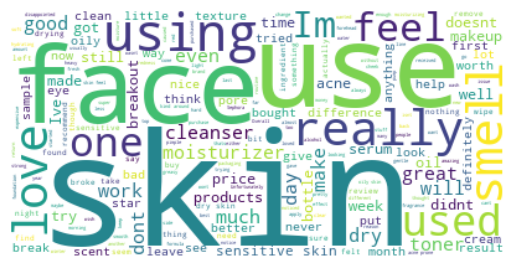

In [29]:
generate_wordcloud(negative_rev)

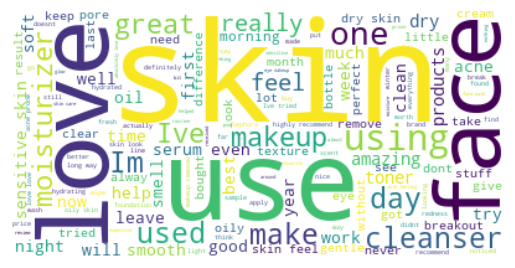

In [30]:
generate_wordcloud(positive_rev)

Using this we can analyze the words in each review .Most of the negative reviews are regarding smell.

In [31]:
moist_df = df[df.Category == 'Moisturizer']
clean_df = df[df.Category == 'Cleanser']
mask_df = df[df.Category == 'Face Mask']
treat_df = df[df.Category == 'Treatment']

In [32]:
moist = " ".join(i for i in moist_df.Ingredients)
clean = " ".join(i for i in clean_df.Ingredients)
mask= " ".join(i for i in mask_df.Ingredients)
treat = " ".join(i for i in treat_df.Ingredients)

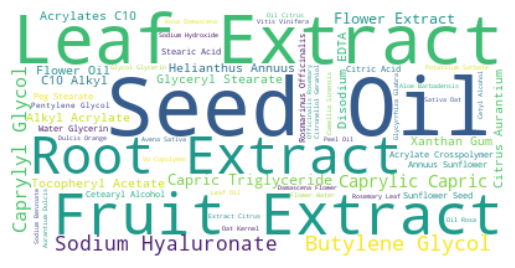

In [33]:
generate_wordcloud(moist)

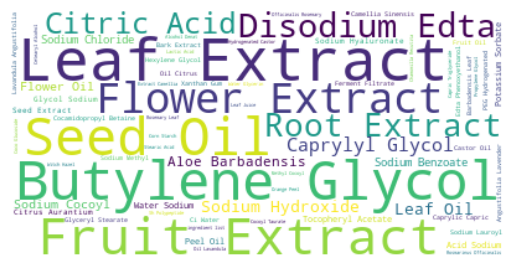

In [34]:
generate_wordcloud(clean)

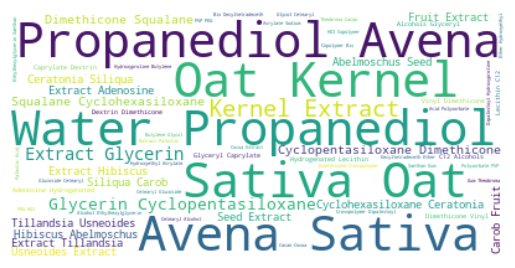

In [35]:
generate_wordcloud(mask)

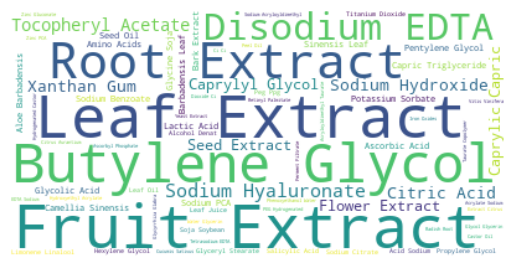

In [36]:
generate_wordcloud(treat)

BUILDING A MODEL TO DISTINGUISH PRODUCTS

In [37]:
X = df.Ingredients
y = df.Category

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [39]:
categories = ['Moisturizer', 'Cleanser', 'Face Mask', 'Treatment']

In [40]:
#Your code snippet demonstrates a typical text classification pipeline using the Naive Bayes algorithm. 

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report

In [42]:
#Naive Bayes
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9653259361997226
              precision    recall  f1-score   support

 Moisturizer       0.96      0.99      0.98      1031
    Cleanser       0.00      0.00      0.00         9
   Face Mask       0.99      0.96      0.98       649
   Treatment       0.94      0.92      0.93       474

    accuracy                           0.97      2163
   macro avg       0.72      0.72      0.72      2163
weighted avg       0.96      0.97      0.96      2163



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9838187702265372
              precision    recall  f1-score   support

 Moisturizer       0.99      0.98      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.97      1.00      0.98       649
   Treatment       0.98      0.99      0.98       474

    accuracy                           0.98      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.98      0.98      0.98      2163



In [44]:
#SVG with SGD
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9754969949144706
              precision    recall  f1-score   support

 Moisturizer       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.96      1.00      0.98       649
   Treatment       0.97      0.96      0.96       474

    accuracy                           0.98      2163
   macro avg       0.98      0.98      0.98      2163
weighted avg       0.98      0.98      0.98      2163



In [45]:
# Creating the KNN pipeline
knn_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=3)),
])

# Fitting the model
knn_pipeline.fit(X_train, y_train)

# Making predictions
y_pred = knn_pipeline.predict(X_test)

# Evaluating the model
print('Accuracy: %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.981044845122515
              precision    recall  f1-score   support

 Moisturizer       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.97      1.00      0.98       649
   Treatment       0.98      0.98      0.98       474

    accuracy                           0.98      2163
   macro avg       0.98      0.99      0.99      2163
weighted avg       0.98      0.98      0.98      2163



In [46]:
dt_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(random_state=42)),
])

# Fitting the model
dt_pipeline.fit(X_train, y_train)

# Making predictions
y_pred = dt_pipeline.predict(X_test)

# Evaluating the model
print('Accuracy: %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.9833564493758669
              precision    recall  f1-score   support

 Moisturizer       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.97      1.00      0.98       649
   Treatment       0.98      0.99      0.98       474

    accuracy                           0.98      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.98      0.98      0.98      2163



In [47]:
#quality check

In [48]:
X1 = df.Ingredients
y1 = df.Good_Stuff
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state = 42)
cat=['1','0']

In [49]:
#Naive Bayes
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train1, y_train1)

y_pred1 = nb.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.5973185390661119
              precision    recall  f1-score   support

           1       0.48      0.25      0.33       856
           0       0.63      0.82      0.71      1307

    accuracy                           0.60      2163
   macro avg       0.56      0.54      0.52      2163
weighted avg       0.57      0.60      0.56      2163



In [50]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train1, y_train1)


y_pred1 = logreg.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.6010171058714748
              precision    recall  f1-score   support

           1       0.49      0.27      0.35       856
           0       0.63      0.82      0.71      1307

    accuracy                           0.60      2163
   macro avg       0.56      0.54      0.53      2163
weighted avg       0.58      0.60      0.57      2163



In [51]:
#SVG with SGD
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train1, y_train1)

y_pred1 = sgd.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.6116504854368932
              precision    recall  f1-score   support

           1       0.61      0.05      0.09       856
           0       0.61      0.98      0.75      1307

    accuracy                           0.61      2163
   macro avg       0.61      0.51      0.42      2163
weighted avg       0.61      0.61      0.49      2163



In [52]:
#Recommender that uses the customer features only to recommend the products

In [53]:
def recommend_products_by_user_features(skintone, skintype, eyecolor, haircolor, percentile=0.85):
    ddf = df[(df['Skin_Tone'] == skintone) & (df['Hair_Color'] == haircolor) & (df['Skin_Type'] == skintype) & (df['Eye_Color'] == eyecolor)]
    
    recommendations = ddf[(ddf['Rating_Stars'].notnull())][['Rating_Stars', 'Product_Url', 'Product']]
    recommendations = recommendations.sort_values('Rating_Stars', ascending=False).head(10)
    
    print('Based on your features, these are the top products for you:')
    return recommendations

In [54]:
recommend_products_by_user_features('Light', 'Combination', 'Green', 'Brunette')

Based on your features, these are the top products for you:


,Rating_Stars,Product_Url,Product
349,5,https://www.sephora.com/product/bi-facil-doubl...,Bi-Facil Double-Action Eye Makeup Remover
1975,5,https://www.sephora.com/product/ultimate-mirac...,Ultimate Miracle Worker Multi-Rejuvenating Cre...
2796,5,https://www.sephora.com/product/aqua-bomb-slee...,Aqua Bomb Sleeping Mask
2914,5,https://www.sephora.com/product/vitamin-c-anti...,Vitamin Nectar Antioxidant Face Mist
2940,5,https://www.sephora.com/product/peat-miracle-r...,Peat Miracle Revital Cream
2994,5,https://www.sephora.com/product/gold-camellia-...,Gold Camellia Beauty Oil
350,5,https://www.sephora.com/product/bi-facil-doubl...,Bi-Facil Double-Action Eye Makeup Remover
3518,5,https://www.sephora.com/product/the-cleansing-...,The Cleansing Foam
3988,5,https://www.sephora.com/product/clean-bee-ultr...,Clean Bee Ultra Gentle Facial Cleanser
4057,5,https://www.sephora.com/product/time-release-a...,Time Release Acne Cleanser


Content-based recommendations using Ingredients of the product

In [55]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [56]:
df_cont = df[['Product', 'Product_id', 'Ingredients', 'Product_Url', 'Ing_Tfidf', 'Rating']]
df_cont.drop_duplicates(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7372\491465484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont.drop_duplicates(inplace=True)


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Creating the TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, stop_words='english')

# Fitting and transforming the 'Ingredients' column
tfidf_matrix = tf.fit_transform(df_cont['Ingredients'])

# Printing the result
print(tfidf_matrix)

  (0, 1465)	0.12738874716055093
  (0, 9165)	0.058528571027157736
  (0, 9273)	0.08505110625948381
  (0, 8281)	0.0577502506599078
  (0, 7860)	0.09825958697473092
  (0, 5524)	0.12738874716055093
  (0, 6084)	0.12738874716055093
  (0, 4286)	0.12738874716055093
  (0, 6820)	0.10813541954549599
  (0, 3953)	0.12738874716055093
  (0, 10292)	0.10813541954549599
  (0, 1023)	0.10430443387453871
  (0, 1387)	0.10430443387453871
  (0, 1022)	0.059752931744621075
  (0, 3716)	0.08369500688182091
  (0, 958)	0.12738874716055093
  (0, 8887)	0.093570839452586
  (0, 6492)	0.093570839452586
  (0, 3934)	0.11886901396744871
  (0, 4232)	0.05391926498895051
  (0, 6468)	0.07798106835591563
  (0, 8602)	0.07798106835591563
  (0, 2190)	0.07606954683922793
  (0, 3783)	0.08650080154901783
  (0, 9732)	0.08805797659960966
  :	:
  (314, 9184)	0.03723618123128342
  (314, 1925)	0.040001453921331837
  (314, 1951)	0.03855491260549142
  (314, 9866)	0.03641756976009072
  (314, 5413)	0.033204683263467226
  (314, 4322)	0.058057651

In [58]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
df_cont = df_cont.reset_index(drop=True)
titles = df_cont[['Product', 'Ing_Tfidf', 'Rating']]
indices = pd.Series(df_cont.index, index=df_cont['Product'])

In [59]:
def content_recommendations(product):
    idx = indices[product]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    product_indices = [i[0] for i in sim_scores]
    return titles.iloc[product_indices]

In [60]:
content_recommendations('The Rice Polish Foaming Enzyme Powder')

,Product,Ing_Tfidf,Rating
38,The Essence Plumping Skin Softener,"saccharomyces, camellia, sinensis, leaf, clado...",4.4
90,Gold Camellia Beauty Oil,"caprylic, capric, triglyceride, ethylhexyl, pa...",4.6
108,Purifying Cleansing Gel,"hydrogenated, starch, hydrolysate, diglycerin,...",4.5
165,Clear Complexion Cleanser,"hydrogenated, starch, hydrolysate, disodium, c...",4.4
43,Luminous Dewy Skin Mist,"glycerin, squalane, olive, origin, cyclopentas...",4.0
115,EradiKate® Daily Cleanser Acne Treatment,"sodium, cocoyl, isethionate, coco, glucoside, ...",4.3
135,Detoxifying Black Charcoal Cleanser,"glycereth, glycerin, sodium, cocoyl, glutamate...",4.3
307,Breakout Fighters,"sodium, cocoyl, isethionate, coco, glucoside, ...",4.0
217,United State™ Balancing Tonic,"lavandula, angustifolia, lavender, flower, ext...",4.3
276,GenOptics Aura Essence Serum,"galactomyces, ferment, filtrate, pitera, niaci...",4.1


Collabrative filtering

In [61]:
!pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [117 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-39\surprise
  creating build\lib.win-amd64-cpython-39\surprise\model_selection
  copying surprise\

In [1]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Assuming df is your DataFrame with columns 'User_id', 'Product_id', and 'Rating_Stars'

# Step 1: Prepare the data for use with surprise
reader = Reader(rating_scale=(df['Rating_Stars'].min(), df['Rating_Stars'].max()))
data = Dataset.load_from_df(df[['User_id', 'Product_id', 'Rating_Stars']], reader)

# Step 2: Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Step 3: Train the SVD model
svd = SVD()
svd.fit(trainset)

# Step 4: Evaluate the model
predictions = svd.test(testset)
print(f'RMSE: {accuracy.rmse(predictions)}')

# Step 5: Create user and item dictionaries
def create_user_dict(interactions):
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict

def create_item_dict(df, id_col, name_col):
    item_dict ={}
    for i in df.index:
        item_dict[(df.loc[i, id_col])] = df.loc[i, name_col]
    return item_dict

interaction_matrix = create_interaction_matrix(df, user_col='User_id', item_col='Product_id', rating_col='Rating_Stars')
user_dict = create_user_dict(interaction_matrix)
product_dict = create_item_dict(df, id_col='Product_id', name_col='Product')

# Step 6: Generate recommendations for a user
def sample_recommendation_user(model, user_id, user_dict, item_dict, nrec_items=10, show=True):
    user_x = user_dict[user_id]
    user_inner_id = model.trainset.to_inner_uid(user_x)
    
    # Get the top N items for this user
    user_ratings = model.trainset.ur[user_inner_id]
    known_items = [model.trainset.to_raw_iid(iid) for (iid, _) in user_ratings]
    
    # Predict ratings for all items
    scores = []
    for item_id in model.trainset.all_items():
        raw_iid = model.trainset.to_raw_iid(item_id)
        if raw_iid not in known_items:
            scores.append((raw_iid, model.predict(user_x, raw_iid).est))
    
    # Sort by predicted rating
    scores.sort(key=lambda x: x[1], reverse=True)
    recommended_items = [iid for (iid, _) in scores[:nrec_items]]
    
    recommended_item_names = list(pd.Series(recommended_items).apply(lambda x: item_dict[int(x)]))
    known_item_names = list(pd.Series(known_items).apply(lambda x: item_dict[int(x)]))
    
    if show:
        print("Recommended items:")
        for item in recommended_item_names:
            print(item)
    
    return recommended_item_names

rec_list = sample_recommendation_user(model=svd, user_id=4792, user_dict=user_dict, item_dict=product_dict, nrec_items=10, show=True)


C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


ModuleNotFoundError: No module named 'surprise'

Deploying model

In [63]:
import joblib

# Train the model
sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)),
])
sgd.fit(X_train1, y_train1)

# Save the model
joblib.dump(sgd, 'model.pkl')

['model.pkl']

In [65]:
from flask import Flask, request, jsonify, render_template
import joblib

app = Flask(__name__)
model = joblib.load('model.pkl')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        text = request.form['text']
        prediction = model.predict([text])
        return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


